In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import f_oneway

## Add clean data

In [6]:
benin=pd.read_csv('data/benin-cleaned.csv')
sierraleone=pd.read_csv('data/togo-cleaned.csv')
togo=pd.read_csv('data/sierraleone-cleaned.csv')

## Creating a column
for the data so it can be distinguished from one another

In [8]:
benin["country"] = "Benin"
sierraleone["country"] = "Sierra Leone"
togo["country"] = "Togo"

In [9]:
all_countries=pd.concat([benin, sierraleone, togo], ignore_index=True)
all_countries

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,Togo
1576796,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,Togo
1576797,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,Togo
1576798,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,Togo


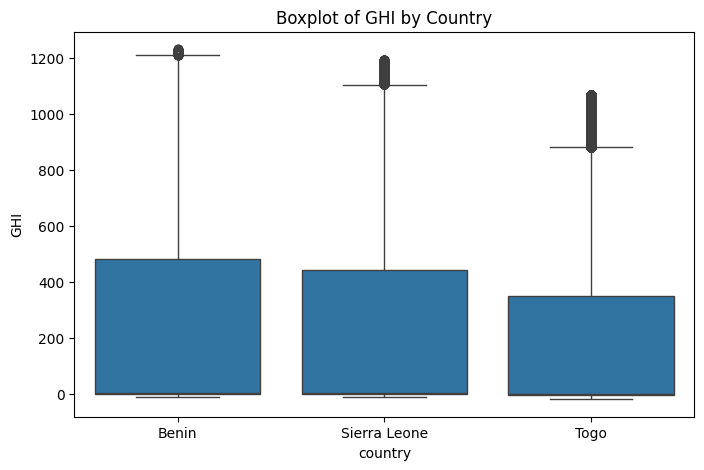

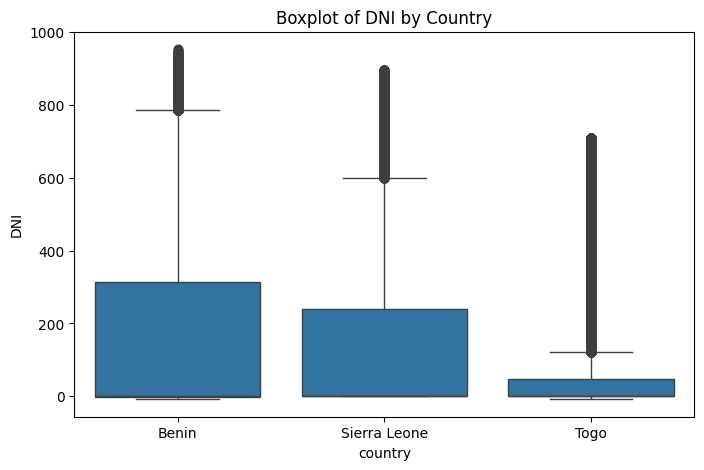

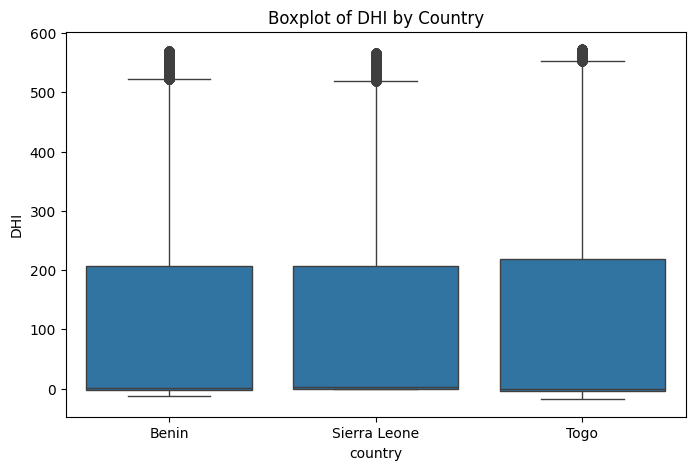

In [12]:
for metrix in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="country", y=metrix, data=all_countries)
    plt.title(f"Boxplot of {metrix} by Country")
    plt.show()

## Summary of Mean, Median and Standard deviation table

In [13]:
summary = all_countries.groupby("country")[["GHI", "DNI", "DHI"]].agg(['mean', 'median', 'std']).round(2)
display(summary)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  108.78    1.6   
Sierra Leone  229.79    2.1  321.60  148.91    0.0  248.00  110.73    2.5   
Togo          194.62    0.3  289.06   93.56   -0.1  186.41  108.91   -0.1   

                      
                 std  
country               
Benin         150.38  
Sierra Leone  149.31  
Togo          152.75

## Statistical Testing

In [18]:
f_stat, p_val = f_oneway(benin["GHI"].dropna(), sierraleone["GHI"].dropna(), togo["GHI"].dropna())
print(f"ANOVA p-value for GHI comparison: {p_val:.4f}")

ANOVA p-value for GHI comparison: 0.0000


## Key Observations
- Benin exhibits the highest average and median GHI, indicating strong and consistent solar irradiance across the dataset. This makes Benin a promising candidate for high-efficiency solar energy projects.
- Sierra Leone shows the greatest variability in GHI and other irradiance metrics, with a wider range and more outliers. This suggests less predictable solar conditions, which may require more robust planning or hybrid energy solutions.
- Togo has moderate irradiance values with relatively stable distributions, making it a balanced option for solar investments not the highest potential, but with good consistency and reliability.

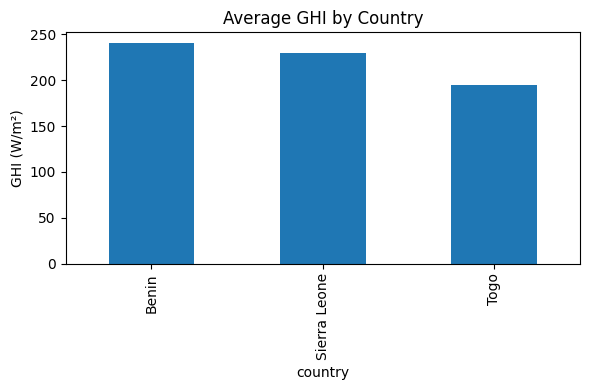

In [19]:
avg_ghi = all_countries.groupby("country")["GHI"].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)', figsize=(6, 4))
plt.tight_layout()
plt.show()